<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/_517751130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170498071/170498071 [00:05<00:00, 28975535.70it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/10], Step [100/391], Loss: 1.6810
Epoch [1/10], Step [200/391], Loss: 1.3215
Epoch [1/10], Step [300/391], Loss: 1.1954
Epoch [1/10], Train Loss: 0.2525, Val Accuracy: 0.6216
Epoch [2/10], Step [100/391], Loss: 0.9996
Epoch [2/10], Step [200/391], Loss: 0.9665
Epoch [2/10], Step [300/391], Loss: 0.9269
Epoch [2/10], Train Loss: 0.2142, Val Accuracy: 0.6765
Epoch [3/10], Step [100/391], Loss: 0.8045
Epoch [3/10], Step [200/391], Loss: 0.7816
Epoch [3/10], Step [300/391], Loss: 0.7738
Epoch [3/10], Train Loss: 0.1783, Val Accuracy: 0.6929
Epoch [4/10], Step [100/391], Loss: 0.6442
Epoch [4/10], Step [200/391], Loss: 0.6516
Epoch [4/10], Step [300/391], Loss: 0.6508
Epoch [4/10], Train Loss: 0.1494, Val Accuracy: 0.7280
Epoch [5/10], Step [100/391], Loss: 0.4906
Epoch [5/10], Step [200/391], Loss: 0.5000
Epoch [5/10], Step [300/391], Loss: 0.5252
Epoch [5/10], Train Loss: 0.1208, Val Accuracy

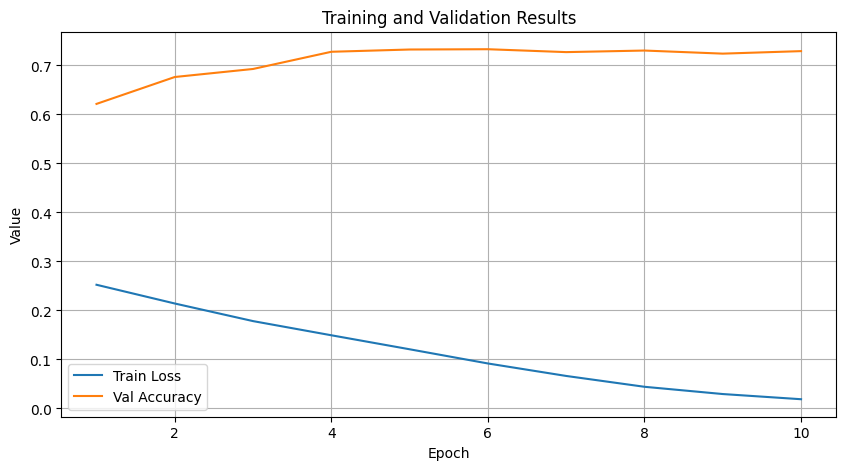

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the model architecture
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 8 * 8, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Define the training loop
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f"Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

# Define the validation loop
def validate(model, val_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Set device and hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 10
learning_rate = 0.001
batch_size = 128
num_epochs = 10

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store training and validation results
train_loss_list = []
val_accuracy_list = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    train_loss_list.append(running_loss / len(train_loader))
    val_accuracy_list.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_list[-1]:.4f}, Val Accuracy: {accuracy:.4f}")

# Plot the training and validation results
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Results')
plt.legend()
plt.grid(True)
plt.show()